<h1 style="text-align:center">Final Exam</h1>
<h3 style="text-align:center">MCHE485: Mechanical Vibrations &mdash; Spring 2016</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In [1]:
import numpy as np                  # import NumPy with the namespace np
from scipy.integrate import odeint  # import the ODE solver for simluation
from scipy import linalg            # import the scipy version of the linear algebra

In [2]:
%matplotlib inline

# import the plotting functions
import matplotlib.pyplot as plt

In [3]:
# Let's also improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

## Problem 1

In [4]:
# define the system paramters
m = 1.0          # mass (kg)
k = 5.0          # spring constant (N/m)

# define the natural frequency (rad/s)
wn = np.sqrt(k/m) 

In [5]:
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the mass-spring-damper system.

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
            wn = natural frequency (rad/s)
            zeta = damping ratio
    """
    x, x_dot = w
    wn, zeta = p

    # Create sysODE = (x', x_dot')
    sysODE = [x_dot,
              -wn**2 * x - 2 * zeta * wn * x_dot]
    return sysODE

In [6]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
x_init = 0.0                        # initial position
x_dot_init = 2.0                    # initial velocity

# Pack the initial conditions into a list
x0 = [x_init, x_dot_init]

In [7]:
# zeta = 0.0 case
# Define the damping ratio
zeta = 0.0

# Pack the damping ratio and natural frequency
p = [wn, zeta]
resp_zeta0p0 = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# zeta = 0.2 case
# Define the damping ratio
zeta = 0.2

# Pack the damping ratio and natural frequency
p = [wn, zeta]
resp_zeta0p2 = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)


# zeta = 0.7 case
# Define the damping ratio
zeta = 0.7

# Pack the damping ratio and natural frequency
p = [wn, zeta]
resp_zeta0p7 = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

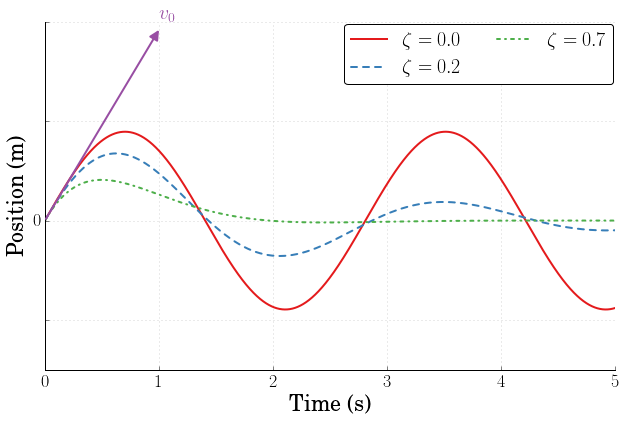

In [8]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=5)

plt.plot(t, resp_zeta0p0[:,0], linewidth=2, linestyle='-', label=r'$\zeta = 0.0$')
plt.plot(t, resp_zeta0p2[:,0], linewidth=2, linestyle='--', label=r'$\zeta = 0.2$')
plt.plot(t, resp_zeta0p7[:,0], linewidth=2, linestyle='-.', label=r'$\zeta = 0.7$')

plt.annotate('$v_0$',
         xy=(0.0, 0), xycoords='data',
         xytext=(1, 2), textcoords='data', fontsize=20,
         arrowprops=dict(arrowstyle='<|-', linewidth = 2, color="#984ea3"), color = "#984ea3")



# uncomment below and set limits if needed
plt.xlim(0, 5)
plt.ylim(-1.5, 2)
plt.yticks([-1, 0, 1, 2], [r'', '$0$', '', '', ''])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Final_Prob1d_Spring2016.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

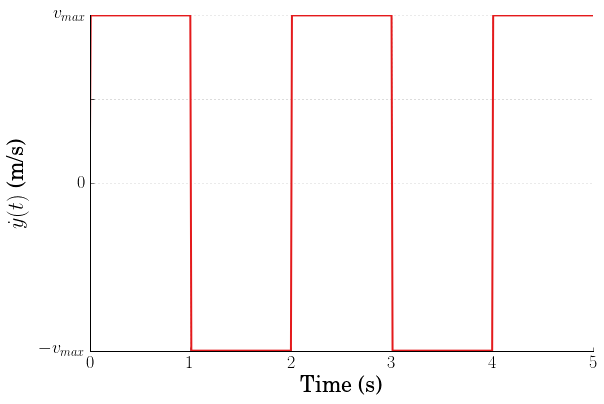

In [9]:
t = np.linspace(0, 5, 501)

U = (t > 0) - 2 * (t > 1) + 2 * (t > 2) - 2 * (t > 3) + 2 * (t > 4) - (t > 5)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'$\dot{y}(t)$ (m/s)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, U, linewidth=2, linestyle='-', label=r'Data 1')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(-1.005, 1.005)
plt.yticks([-1, 0.5, 0, 0.5, 1], ['$-v_{max}$', '', '$0$', '', '$v_{max}$'])
                                

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_FinalExam_SquareWave_Spring2016.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

On the exam, we just had to set up the fourier expansion of this signal. Here, we can look at the full expansion.

In [10]:
#--------- This is the actual Numerical Fourier Expansion --------
# Define the input over one period
t = np.linspace(0, 2, 2001)

U = (t > 0) - 2 * (t > 1) + 2 * (t > 2) - 2 * (t > 3) + 2 * (t > 4) - (t > 5)
w0 = np.pi

# Our standard Fourier expansion code below wants the input to be y, 
# So, define y = U over one period of the signal
y = U


# define the number of terms to use in the approximation
num_terms = 9

# get the a0 term
a0 = w0 / (2.0 * np.pi) * np.trapz(y, t)  

# fill arrays with zeros - Good practice, it speeds computation in large problems
a = np.zeros((num_terms,))
b = np.zeros((num_terms,))
integral_cos = np.zeros((len(t),num_terms))
integral_sin = np.zeros((len(t),num_terms))
sin_term = np.zeros((num_terms,len(t)))
cos_term = np.zeros((num_terms,len(t)))

# cycle through the 1 to num_terms Fourier coefficients (a_n and b_n)
for n in range(num_terms):

    # a_n calculations
    integral_cos[:,n] = y * np.cos((n+1)*w0*t)            # define the integral "interior"
    a[n] = w0 / np.pi * np.trapz(integral_cos[:,n], t)    # solve for a_n

    # b_n calculations
    integral_sin[:,n] = y * np.sin((n+1)*w0*t)            # define the integral "interior"
    b[n] = w0 / np.pi * np.trapz(integral_sin[:,n], t)    # solve for b_n
    
    sin_term[n,:] = np.sin((n+1)*w0*t)                    # calculate the nth sine term
    cos_term[n,:] = np.cos((n+1)*w0*t)                    # calculate the nth cosine_term


# Generate the approximate input based on the Fourier coeff. calculated above
approx = np.zeros_like(t) #First fill with zeros

for ii in range(len(t)):
     approx[ii] = a0 + np.sum(a * cos_term[:,ii],0) + np.sum(b * sin_term[:,ii],0)

In [11]:
# Let's print out the a_n and b_n terms for inspection
print('\nThe a0 term is {:0.4f}.\n\n'.format(a0))

print('The a_n terms are:')
print('\n  ' + np.array_str(a, precision=4, suppress_small=True))

print('\n\nThe b_n terms are:')
print('\n  ' + np.array_str(b, precision=4, suppress_small=True))


The a0 term is 0.0003.


The a_n terms are:

  [-0.0015  0.0005 -0.0015  0.0005 -0.0015  0.0005 -0.0015  0.0005 -0.0015]


The b_n terms are:

  [ 1.2732  0.      0.4244 -0.      0.2546  0.      0.1819 -0.      0.1415]


<br>
***Note***: Due to numerical precision of our numerical integration, we might have terms that are nonzero when they should be. Use your engineering knowledge/judgement to determine if this is happening.
<br>
<br>

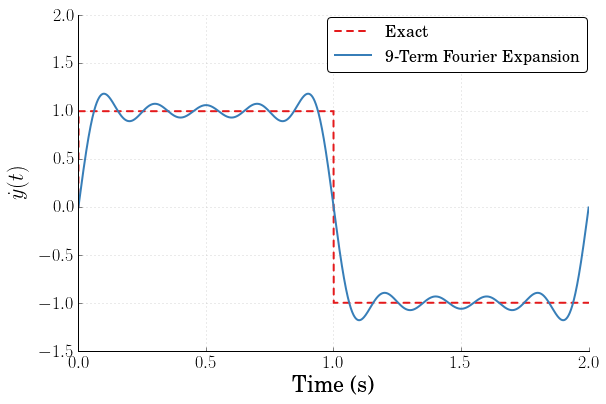

In [12]:
# Now, let's plot the comparison


# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Time (s)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\dot{y}(t)$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t, y, '--', linewidth=2, label=r'Exact')

f = str(num_terms) + '-Term Fourier Expansion'
plt.plot(t, approx, linewidth=2, label=f)

plt.ylim(-1.5,2.0)

leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Problem 2

In [13]:
# This system is just a standard direct force system

k = 1.0

# Set up input parameters
wun = np.linspace(0,5,500)          # Frequency range for freq response plot, 0-5 Omega with 500 points in-between
w = np.linspace(0,5,500)            # Frequency range for freq response plot, 0-5 Omega with 500 points in-between

# Let's examine a few different damping ratios
z = 0.0
mag_normal_un = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_un = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi

# Let's mask the phase discontinuity, so it isn't plotted
pos = np.where(np.abs(k*mag_normal_un) >= 25)
phase_un[pos] = np.nan
wun[pos] = np.nan

z = 0.2
mag_normal_0p2 = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_0p2 = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi

z = 0.7
mag_normal_0p7 = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_0p7 = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi

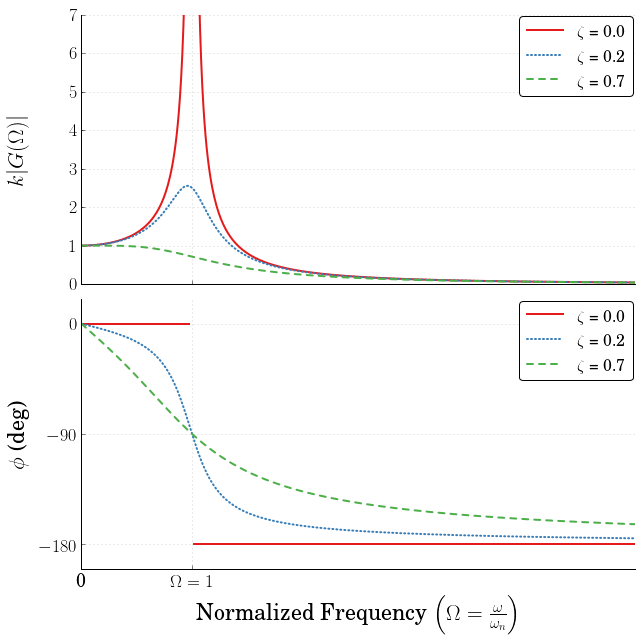

In [14]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.xticks([0,1],['0','$\Omega = 1$'])

# Magnitude plot
ax1.set_ylabel(r'$ k|G(\Omega)| $',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.plot(wun, k*mag_normal_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax1.plot(w, k*mag_normal_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax1.plot(w, k*mag_normal_0p7, linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.7')
ax1.set_ylim(0.0,7.0)
ax1.set_yticks([0,1,2,3,4,5],['0', '1'])

ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
ax2.plot(wun, phase_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax2.plot(w, phase_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax2.plot(w, phase_0p7, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.7')
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

ax2.leg = ax2.legend(loc='upper right', fancybox=True)
ltext  = ax2.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
plt.savefig('MCHE485_FinalExam_RotDirectForce_Spring2016.pdf',dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

## Problem 4

### The Undamped problem
Let's look first at an undamped version of this system ($c_1 = c_2 = c_3 = 0$).

For the undamped proble we can use $M$ and $K$ directly to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = 0 $ 

for $\bar{X}$. This is an eigenvalue problem.

In [15]:
# Define the matrices
m1 = 1.0  # kg
m2 = 5.0  # kg
m3 = 1.0  # kg

k = 1.0  # N/m

M = np.asarray([[m1,  0, 0],
                [0,  m2, 0],
                [0,   0, m3]])

K = np.asarray([[k, -k, 0],
                [-k, 2 * k, -k],
                [0, -k, k]])
                

In [16]:
eigenvals, eigenvects = linalg.eigh(K, M)

In [17]:
print('\n')
print('The resulting eigenalues are {:.2f}, {:.2f}, and {:.2f}.'.format(eigenvals[0], eigenvals[1], eigenvals[2]))
print('\n')
print('So the two natrual frequencies are {:.2f}rad/s, {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1]), np.sqrt(eigenvals[2])))
print('\n')



The resulting eigenalues are 0.00, 1.00, and 1.40.


So the two natrual frequencies are 0.00rad/s, 1.00rad/s and 1.18rad/s.




In [18]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')
print('The third eigenvector is ' + str(eigenvects[:,2]) + '.')
print('\n')



The first eigenvector is [ 0.378  0.378  0.378].


The second eigenvector is [-0.707 -0.     0.707].


The third eigenvector is [-0.598  0.239 -0.598].




To simluate the system, we'll define the equations of motion as a system of first order differenential equations, then use ```odeint``` to solve them for each set of initial conditions. We'll just look at the undamped case, as that is all the problem is asking for.

In [19]:
# Define the system as a series of 1st order ODEs (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot, x3, x3_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, m3, m4, k]
    """
    x1, x1_dot, x2, x2_dot, x3, x3_dot = w
    m1, m2, m3, k = p

    # Create sysODE = (x', x_dot'): - Here, we're assuming f(t) = 0
    sysODE = [x1_dot,
             (-k * x1 + k * x2) / m1,
             x2_dot,
             (k * x1 - 2 * k * x2 + k * x3 + f(w, t, p)) / m2,
             x3_dot,
             (k * x2 - k * x3) / m3]
    return sysODE
              
def f(w, t, p):
    """ 
    Defines the input force on the three-mass sytem
    
    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot, x3, x3_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, m3, m4, k]
    """
    # Just return zero, because we're looking at initial condition responses
    return 0

In [20]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

### Problem 4.c.i.

In [21]:
# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = 0.5                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity
x3_init = 0.5                       # initial x3 position
x3_dot_init = 0.0                   # initial x3 velocity   

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, m3, k]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init, x3_init, x3_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

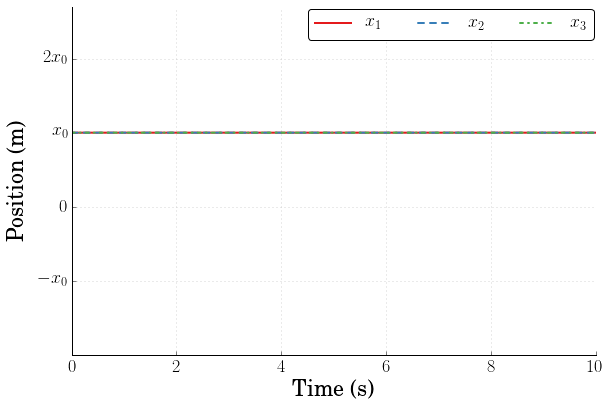

In [22]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')
plt.plot(t,resp[:,4],linewidth=2,linestyle="-.",label=r'$x_3$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 3, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('MCHE485_Final_Prob4ci.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Problem 4.c.ii.

In [23]:
# Initial conditions
x1_init = 0.0                       # initial x1 position
x1_dot_init = 1.0                   # initial x1 velocity
x2_init = 0.0                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity
x3_init = 0.0                       # initial x3 position
x3_dot_init = -1.0                  # initial x3 velocity   

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, m3, k]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init, x3_init, x3_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

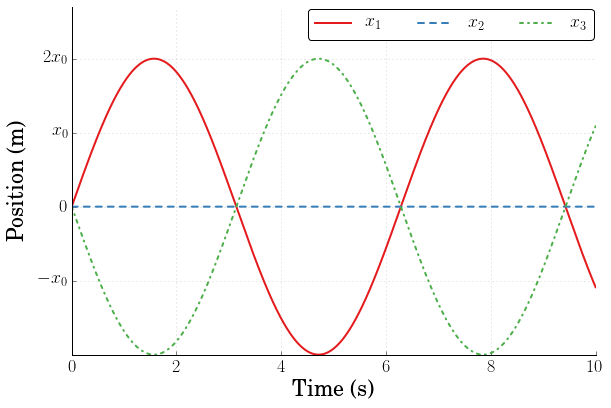

In [24]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')
plt.plot(t,resp[:,4],linewidth=2,linestyle="-.",label=r'$x_3$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 3, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('MCHE485_Final_Prob4cii.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Problem 4.c.iii.

In [25]:
# Initial conditions
x1_init = 0.0                       # initial x1 position
x1_dot_init = 0.1                   # initial x1 velocity
x2_init = 0.0                       # initial x2 position
x2_dot_init = 0.1 + 1e-2            # initial x2 velocity
x3_init = 0.0                       # initial x3 position
x3_dot_init = 0.1                   # initial x3 velocity          

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, m3, k]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init, x3_init, x3_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

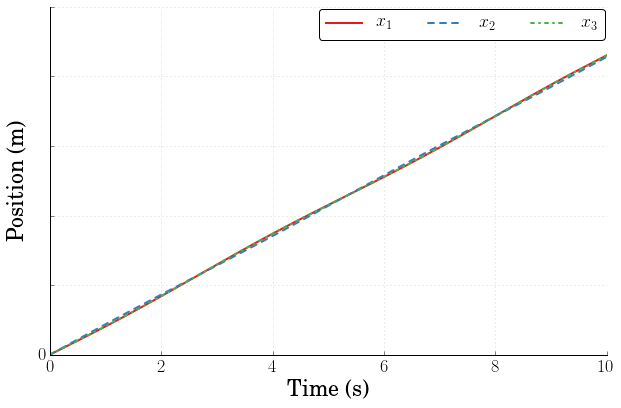

In [26]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')
plt.plot(t,resp[:,4],linewidth=2,linestyle="-.",label=r'$x_3$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(0,1.35)
plt.yticks([0,0.25,0.5, 0.75,1.0,1.25],['$0$','','','','',''])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 3, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('MCHE485_Final_Prob4ciii.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Problem 5

In [27]:
# Define the matrices
mt = 5.0 # kg
m = 1.0  # kg

k = 5.0  # N/m
l = 2.0  # m
g = 9.81 # m/s^2


M = np.asarray([[mt + m, m * l],
                [m * l,  m * l**2]])

K = np.asarray([[k, 0],
                [0, m * g * l]])

In [28]:
eigenvals, eigenvects = linalg.eigh(K, M)

In [29]:
print('\n')
print('The resulting eigenalues are {:.2f} and {:.2f}.'.format(eigenvals[0], eigenvals[1]))
print('\n')
print('So the two natrual frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1])))
print('\n')



The resulting eigenalues are 0.81 and 6.08.


So the two natrual frequencies are 0.90rad/s and 2.47rad/s.




In [30]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')



The first eigenvector is [-0.394 -0.039].


The second eigenvector is [-0.211  0.546].




<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [31]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())